<a href="https://colab.research.google.com/github/mohorka/Intelligent_System/blob/main/DimReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install umap-learn MulticoreTSNE

     |████████████████████████████████| 86 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 12.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=43cf051c000f8441a46cdb1cb2043e5f5d0cd7ece481e792bd4532912a742049
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=1e59450cc7d1fc112da1ae60ee36bad3552dd83c1d504c808686395fd258ae79
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp37-cp37m-linux_x86_64.whl size=68518 sha256=73d79426a6a2d03fc91c6f39b3be8eb12a8f93b90b11df51756c9299f62ed32e
  Stored in directory: /root/.cache/pip/wheels/80/47/df/c0d66e9f775f33281c422a1964de86a59c47f93bb8c37643e3
Successfully built umap-learn pynndescent MulticoreTSNE


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import gensim
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
#from sklearn.preprocessing import StandardScaler
from umap import UMAP
from scipy import io
from sklearn.datasets import load_digits
from MulticoreTSNE import MulticoreTSNE as TSNE
import torch

Algos: UMAP, t-SNE, PCA

---


Datasets: MNIST, COIL20, GoogleNews

In [11]:
#Google News Dataset
EMBEDDING_FILE = "/root/input/GoogleNews-vectors-negative300.bin.gz"
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
model = gensim.models.KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)
news_data = model.vectors


--2021-11-25 12:34:31--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.112.197
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.112.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  36.2MB/s    in 44s     

2021-11-25 12:35:15 (35.4 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [7]:
#COIL-20
!wget https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
coil20 = io.loadmat('COIL20.mat?raw=true')
labels = coil20['Y']
coil20 = coil20['X']

--2021-11-25 12:34:02--  https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
Resolving jundongl.github.io (jundongl.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jundongl.github.io (jundongl.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3024549 (2.9M) [application/octet-stream]
Saving to: ‘COIL20.mat?raw=true.1’

COIL20.mat?raw=true 100%[===================>]   2.88M  --.-KB/s    in 0.03s   

2021-11-25 12:34:02 (82.5 MB/s) - ‘COIL20.mat?raw=true.1’ saved [3024549/3024549]



In [17]:
#MNIST
digits = load_digits()
reducer = UMAP(random_state=42)
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)
print('Original shape: '+str(digits.data.shape)+'\n'+'Reducted shape: '+str(embedding.shape))

Original shape: (1797, 64)
Reducted shape: (1797, 2)


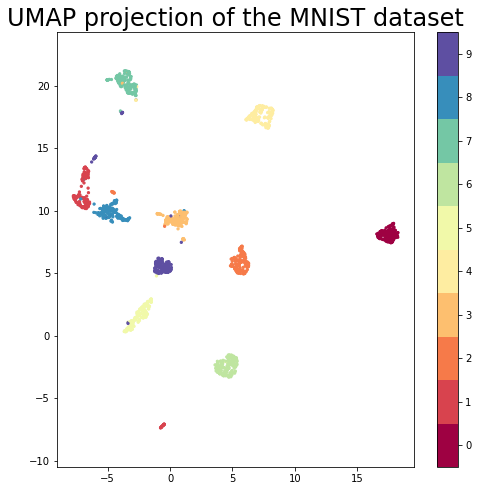

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the MNIST dataset', fontsize=24);

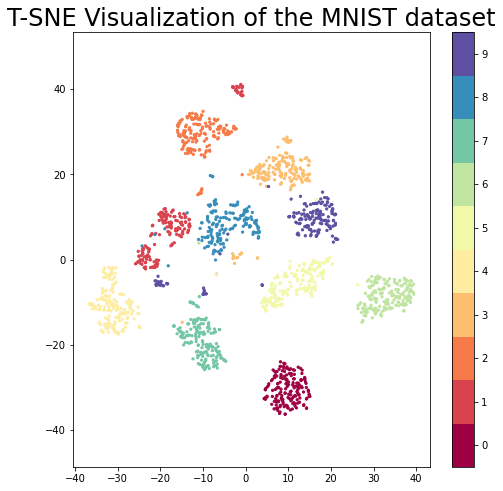

In [19]:
reduced = TSNE(n_components=2, random_state=42,n_jobs=-1).fit_transform(digits.data)
plt.figure(figsize=(8,8))
plt.scatter(reduced[:, 0], reduced[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('T-SNE Visualization of the MNIST dataset', fontsize=24);

In [20]:
cuda0 = torch.device('cuda:0')
x = torch.tensor(digits.data, device=cuda0)
u, s, v = torch.pca_lowrank(x)


In [15]:
x.shape

torch.Size([1797, 64])

In [16]:
v.shape

torch.Size([64, 6])

In [17]:
u.shape

torch.Size([1797, 6])

In [18]:
s.shape

torch.Size([6])

In [21]:
reduced = torch.matmul(x,v[:,:2])
reduced.shape

torch.Size([1797, 2])

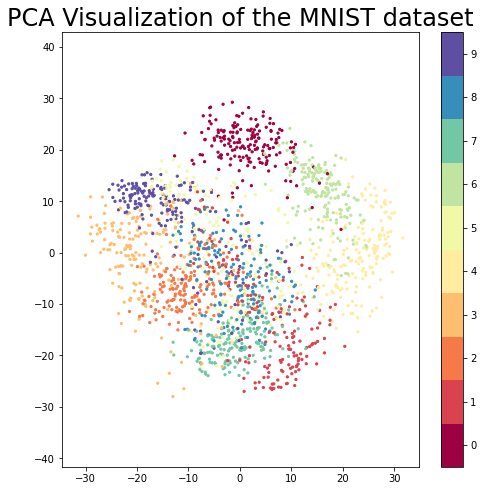

In [22]:
reduced = reduced.cpu()
plt.figure(figsize=(8,8))
plt.scatter(reduced[:, 0], reduced[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('PCA Visualization of the MNIST dataset', fontsize=24);

In [23]:
news_data = torch.tensor(news_data, device=cuda0)
u, s, v = torch.pca_lowrank(news_data)


In [23]:
u.shape

torch.Size([3000000, 6])

In [24]:
news_data.shape

torch.Size([3000000, 300])

In [25]:
v.shape

torch.Size([300, 6])

In [24]:
#k = int(input('Enter the  wishful number of principal components:'))
reduced = torch.matmul(news_data,v[:,:6])
reduced.shape

torch.Size([3000000, 6])

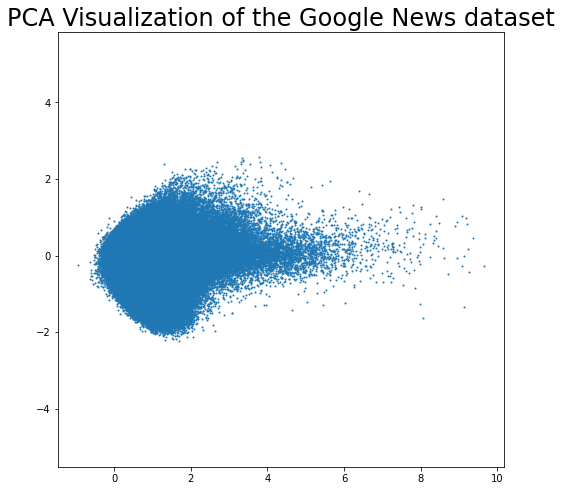

In [25]:
reduced = reduced.cpu()
plt.figure(figsize=(8,8))
plt.scatter(reduced[:, 0], reduced[:, 1], cmap='Spectral', s=1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA Visualization of the Google News dataset', fontsize=24);

In [26]:
embedding = UMAP(random_state=42).fit_transform(coil20)
print('Original shape: '+str(coil20.shape)+'\n'+'Reducted shape: '+str(embedding.shape))

Original shape: (1440, 1024)
Reducted shape: (1440, 2)


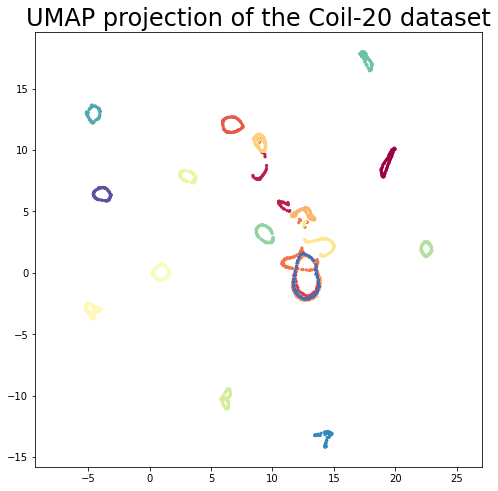

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Coil-20 dataset', fontsize=24);

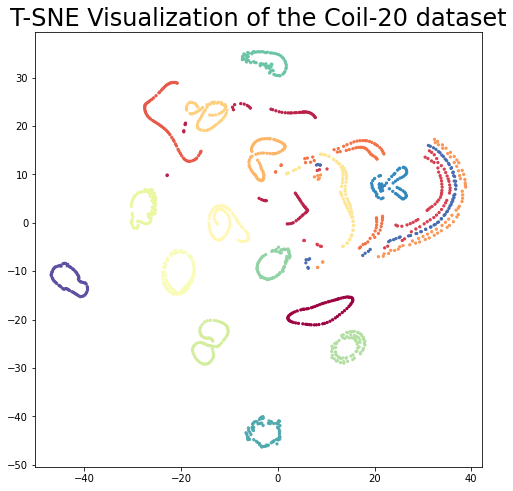

In [29]:
reduced = TSNE(n_components=2, random_state=42,n_jobs=-1).fit_transform(coil20)
plt.figure(figsize=(8,8))
plt.scatter(reduced[:, 0], reduced[:, 1],c=labels, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('T-SNE Visualization of the Coil-20 dataset', fontsize=24);

In [30]:
coil20 = torch.tensor(coil20,device=cuda0)
u, s, v = torch.pca_lowrank(coil20)
v.shape


torch.Size([1024, 6])

In [31]:
reduced = torch.matmul(coil20,v[:,:6])
reduced.shape

torch.Size([1440, 6])

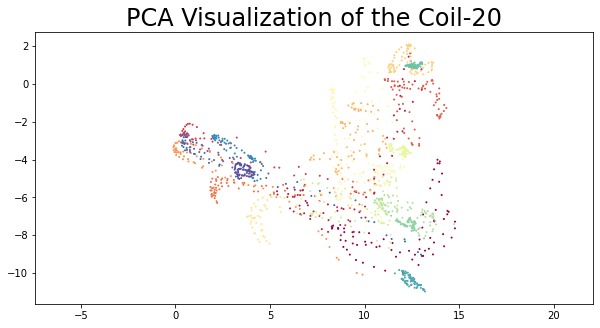

In [33]:
reduced = reduced.cpu()
plt.figure(figsize=(10,5))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='Spectral', s=1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA Visualization of the Coil-20', fontsize=24);

The following code (probably)
 works only with special GPU (Tesla T4, Tesla P100), so check type of GPU 


In [34]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi -L

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
GPU 0: Tesla K80 (UUID: GPU-2ff15fcc-407b-4fa8-cc93-ed33fcf168d0)


In [ ]:
!pip install pynvml
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

In [ ]:
import cuml

In [36]:
news_data = news_data.cpu()

In [ ]:
embedded=cuml.UMAP(random_state=42).fit_transform(news_data,output_type='numpy')

In [ ]:
embedded = cuml.TSNE(random_state=42).fit_transform(news_data,output_type='numpy')